# Load and Inspect the Data
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("global_energy_consumption.csv")

# Basic Info
df.info

# Display first few rows
df.head()

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48


# Handle Missing Values
---

In [3]:
# Check for missing values
df.isnull().sum()

# option 1 : fill missing valueswith mean/median (if applicable)
# df.fillna(df.mean(), inplace=True)

# Option 2 : Drop Rows with missing Values
df.dropna(inplace=True)

# Check for Duplicates
---

In [5]:
# Check for duplicate rows
print(f"Duplicate Row : {df.duplicated().sum()}")

# Drop Duplicates
df.drop_duplicates(inplace=True)

Duplicate Row : 0


# Convert Data Types
---

In [6]:
# Convert Year to categorical type
df["Year"] = df["Year"].astype(str)

# Descriptive Statistics
---

In [7]:
# Summary statistics
df.describe()

# Grouped statistics (e.g., average energy use per country)
df.groupby("Country")["Total Energy Consumption (TWh)"].mean().sort_values(ascending=False)


Country
USA          5323.466676
Japan        5279.490111
India        5266.872149
UK           5262.176180
Germany      5184.558661
Canada       5086.422684
Russia       5058.404550
Australia    5046.237081
China        5036.665137
Brazil       4858.032318
Name: Total Energy Consumption (TWh), dtype: float64

# Data Visualization
---

### Energy Consumption Trends Over Time

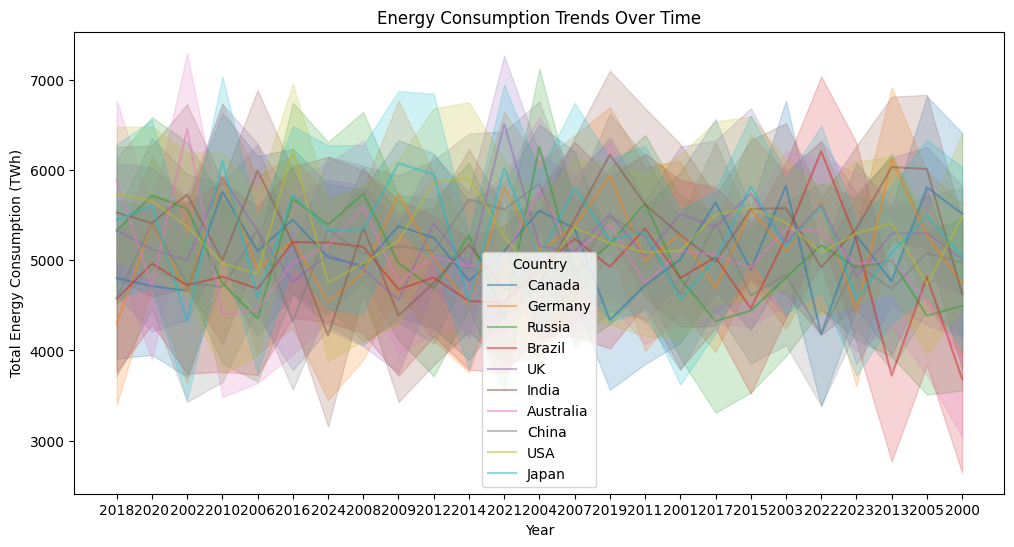

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Year", y="Total Energy Consumption (TWh)", hue="Country", alpha=0.5)
plt.title("Energy Consumption Trends Over Time")
plt.show()

### Corelation Heatmap

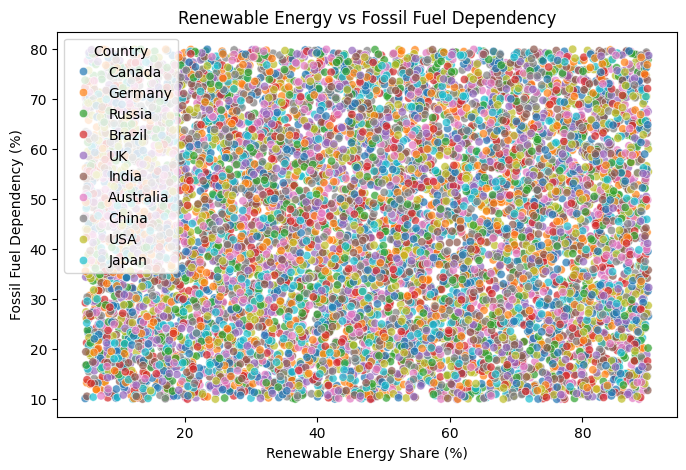

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Renewable Energy Share (%)", y="Fossil Fuel Dependency (%)", hue="Country", alpha=0.7)
plt.title("Renewable Energy vs Fossil Fuel Dependency")
plt.show()

# Feature Engineering

### Carbon Intensity per kWh

In [10]:
df["Carbon Intensity (Tons per TWh)"] = df["Carbon Emissions (Million Tons)"] / df["Total Energy Consumption (TWh)"]


### Fossil Fuel vs. Renewable Ratio

In [11]:
df["Fossil-to-Renewable Ratio"] = df["Fossil Fuel Dependency (%)"] / df["Renewable Energy Share (%)"]


### Energy Use Distribution Feature

In [13]:
df["Industrial-to-Household Ratio"] = df["Industrial Energy Use (%)"] / df["Household Energy Use (%)"]


### Categorizing Countries by Energy Use

In [14]:
def energy_category(energy):
    if energy < df["Total Energy Consumption (TWh)"].quantile(0.33):
        return "Low"
    elif energy < df["Total Energy Consumption (TWh)"].quantile(0.66):
        return "Medium"
    else:
        return "High"

df["Energy Consumption Category"] = df["Total Energy Consumption (TWh)"].apply(energy_category)


___

# Energy Sustainability Index (ESI)


In [15]:
# Normalize Carbon Intensity (scaling between 0 and 1)
df["Carbon Intensity (Tons per TWh)"] = df["Carbon Emissions (Million Tons)"] / df["Total Energy Consumption (TWh)"]
df["Normalized Carbon Intensity"] = df["Carbon Intensity (Tons per TWh)"] / df["Carbon Intensity (Tons per TWh)"].max()

# Compute Energy Sustainability Index (ESI)
df["Energy Sustainability Index"] = (df["Renewable Energy Share (%)"] / 100) - \
                                    (df["Fossil Fuel Dependency (%)"] / 100) - \
                                    df["Normalized Carbon Intensity"]

# Display top 10 most sustainable countries
df[["Country", "Year", "Energy Sustainability Index"]].sort_values(by="Energy Sustainability Index", ascending=False).head(10)


,Country,Year,Energy Sustainability Index
5172,Australia,2017,0.772709
3972,India,2020,0.770436
5442,Brazil,2013,0.769007
544,Japan,2017,0.768212
2060,Russia,2003,0.766153
9405,USA,2003,0.762705
4922,UK,2011,0.761085
7731,Canada,2004,0.758465
7778,USA,2020,0.756741
4819,Australia,2000,0.755920


___

# ESI Visualization

### Top 10 Most Sustainable Counties (Bar Chart)

C:\Users\iqb43\AppData\Local\Temp\ipykernel_26820\1069260470.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sustainable.index, y=top_sustainable.values, palette="viridis")


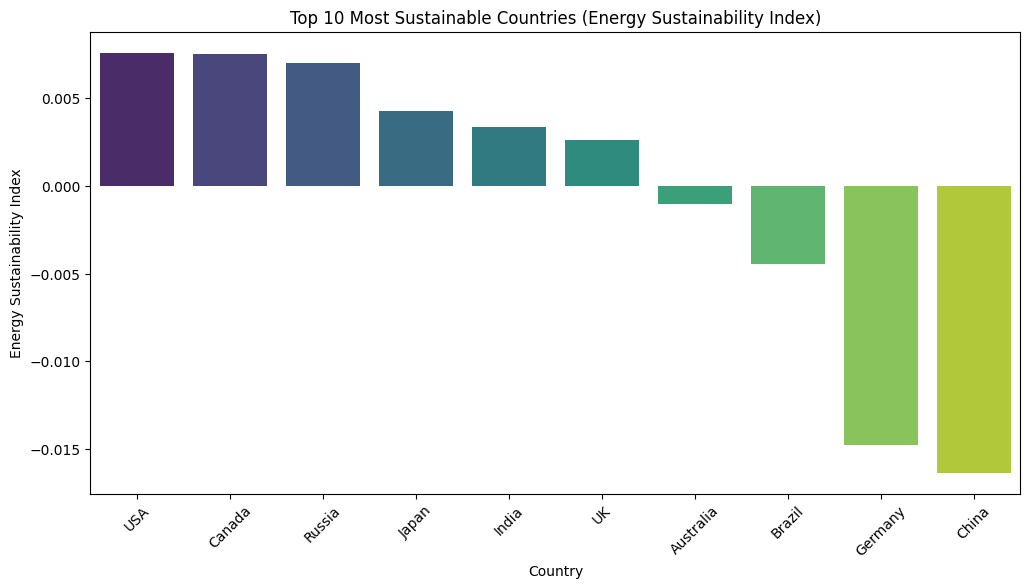

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 most sustainable countries
top_sustainable = df.groupby("Country")["Energy Sustainability Index"].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sustainable.index, y=top_sustainable.values, palette="viridis")

# Labels & Title
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Energy Sustainability Index")
plt.title("Top 10 Most Sustainable Countries (Energy Sustainability Index)")

plt.show()


### Energy Sustainiability Over Time (Line Plot)

C:\Users\iqb43\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


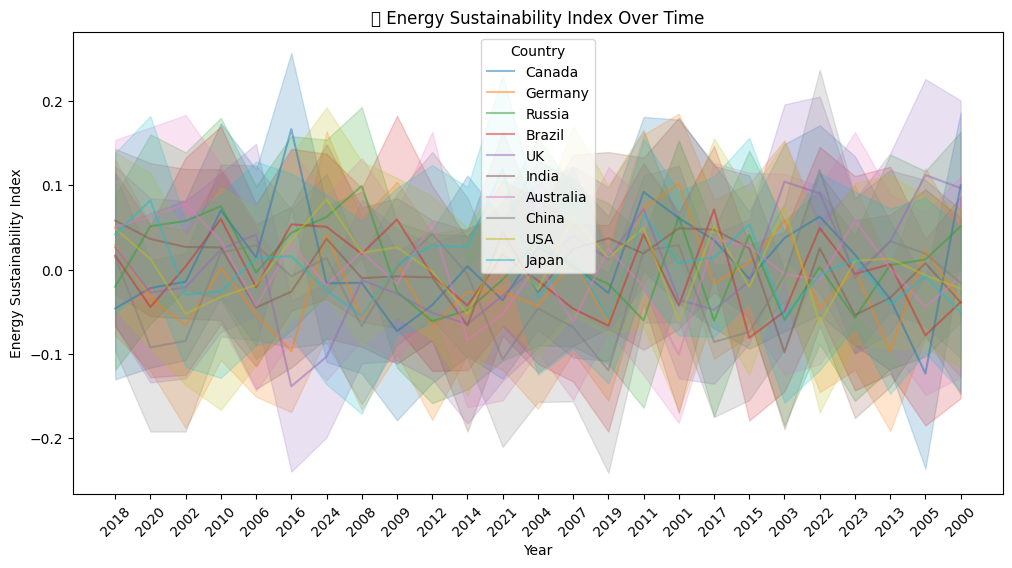

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Energy Sustainability Index", hue="Country", alpha=0.5)

plt.title("📈 Energy Sustainability Index Over Time")
plt.xticks(rotation=45)
plt.ylabel("Energy Sustainability Index")

plt.show()


### Heatmap of energy Sustainability by Country & Year

C:\Users\iqb43\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


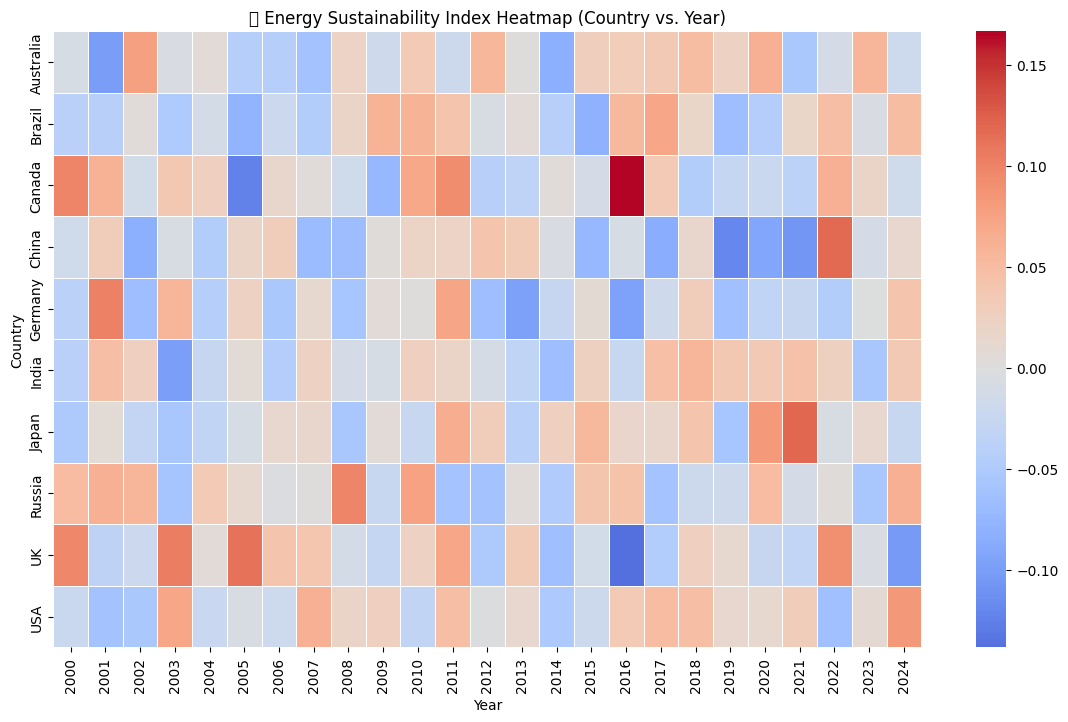

In [19]:
plt.figure(figsize=(14, 8))
pivot_df = df.pivot_table(values="Energy Sustainability Index", index="Country", columns="Year")
sns.heatmap(pivot_df, cmap="coolwarm", center=0, linewidths=0.5)

plt.title("🔥 Energy Sustainability Index Heatmap (Country vs. Year)")
plt.xlabel("Year")
plt.ylabel("Country")

plt.show()


# Interactive Dashboard

In [21]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load Data
df = pd.read_csv("global_energy_consumption.csv")

# Compute Energy Sustainability Index
df["Carbon Intensity (Tons per TWh)"] = df["Carbon Emissions (Million Tons)"] / df["Total Energy Consumption (TWh)"]
df["Normalized Carbon Intensity"] = df["Carbon Intensity (Tons per TWh)"] / df["Carbon Intensity (Tons per TWh)"].max()

df["Energy Sustainability Index"] = (df["Renewable Energy Share (%)"] / 100) - \
                                    (df["Fossil Fuel Dependency (%)"] / 100) - \
                                    df["Normalized Carbon Intensity"]

# Initialize Dash App
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("🌍 Energy Sustainability Dashboard", style={'text-align': 'center'}),
    
    dcc.Dropdown(
        id="country-dropdown",
        options=[{"label": country, "value": country} for country in df["Country"].unique()],
        value="Canada",
        clearable=False,
        style={'width': "50%", 'margin': 'auto'}
    ),
    
    dcc.Graph(id="line-chart"),
    
    dcc.Graph(id="choropleth-map"),
])

# Callbacks
@app.callback(
    Output("line-chart", "figure"),
    [Input("country-dropdown", "value")]
)
def update_line_chart(selected_country):
    filtered_df = df[df["Country"] == selected_country]
    fig = px.line(
        filtered_df, x="Year", y="Energy Sustainability Index",
        title=f"📈 {selected_country} - Energy Sustainability Over Time"
    )
    return fig

@app.callback(
    Output("choropleth-map", "figure"),
    [Input("country-dropdown", "value")]
)
def update_map(_):
    latest_year = df["Year"].max()
    latest_data = df[df["Year"] == latest_year]
    
    fig = px.choropleth(
        latest_data, locations="Country", locationmode="country names",
        color="Energy Sustainability Index", title=f"🌍 Global Sustainability Index ({latest_year})",
        color_continuous_scale="Viridis"
    )
    return fig

# Run App
if __name__ == '__main__':
    app.run_server(mode='inline')
